In [1]:
import heppackv0 as hep
import sympy as sy

Reading heppackv0.py (july 2022)

Done


In [2]:
theta, phi, zeta = sy.symbols("theta phi zeta",real=True)
E,D,m = sy.symbols("E D m",real=True,positive=True)
a,b,c,d = sy.symbols("a b c d",commutative=False)
A,B,C,D = sy.symbols("A B C D",commutative=False)

### Task: Calculate $\overline{\psi}^c \psi^c$ and compare to $\overline{\psi} \psi$

### 1. Analytic calculation

Die Lösung ist, dass man ein Minuszeichen beim Vertauschen von Fermionfeldern anbringen muss.

Am Einfachsten kann man das so zeigen (mit $C = i \gamma^2 \gamma^0$)

$\psi^c = C \,(\overline{\psi})^T = i \gamma^2 \psi^*
= -i(\bar\psi \gamma^0 \gamma^2)^T$, (s. Test1) <br>
$\overline{\psi^c} = - \psi^T C^\dagger$, (s. Test2)

Damit folgt

$\overline{\psi^c} \psi^c = -\psi^T C^\dagger C\bar{\psi}^T = -\psi^T\bar{\psi}^T = + (\bar{\psi} \psi)^T = \bar{\psi} \psi$,

mit $C^\dagger C = 1$, s. Test 3

Das + Zeichen im vorletzten Schritt kommt vom Antikommutator beim Vertauschen von Fermionen. Da $\bar{\psi} \psi$ ein Skalar ist, sind die letzten beiden Terme gleich.

### Dieser Beweis, Peskin Schroeder, und alle meine Beweise kranken an der Tatsache, dass in der Anwendung auf freie Fermionen der erste Term in Deiner Gleichung $-2m$ und der letzte $+2m$ ergibt. Wo liegt der gedankliche Fehler?

In [3]:
pe=[E,m,theta,phi]

In [4]:
C = sy.I*hep.g2*hep.g0
uC=C*(hep.ubar(pe,1)).T
uCbar=-hep.u(pe,1).T*C.T

In [5]:
uC==hep.v(pe,1)

True

In [6]:
uCbar==hep.vbar(pe,1)

True

In [7]:
uCbar*uC==hep.ubar(pe,1)*hep.u(pe,1)

False

#### Test 1: zeige $\psi^c = C \,(\overline{\psi})^T = i \gamma^2 \psi^*$

'psic: '

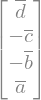

'psic2: '

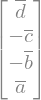

'psic3: '

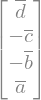

In [8]:
psi = sy.Matrix([[a],[b],[c],[d]])
psibar = psi.D
C = sy.I*hep.g2*hep.g0
psic = sy.I*hep.g2*psi.C
psic2 = C*psibar.T
psic3 = sy.I*(psibar*hep.g0*hep.g2).T
display("psic: ", psic)
display("psic2: ", psic2)
display("psic3: ", psic3)

#### Test2:  zeige $\overline{\psi} = - \psi^T C^\dagger = (i\gamma^0 \gamma^2 \psi)^T$ , 
last term is comparison with Schroeder, p. 70, 
he uses an additional minus sign, which I removed

In [9]:
psicbar = psic.D
psicbar2 = -psi.T*C.H
psicbar3 = (sy.I*hep.g0*hep.g2*psi).T
psicbar4 =  sy.I*(hep.g0*hep.g2*psi).T
display("psicbar: ", psicbar)
display("psicbar2: ", psicbar2)
display("psicbar3: ", psicbar3)
display("psicbar4: ", psicbar4)

'psicbar: '

'psicbar2: '

'psicbar3: '

'psicbar4: '

#### Test 3: zeige $C^\dagger C = 1$

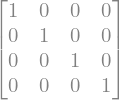

In [10]:
C.H*C

# Test

In [11]:
psicbar4*psic3

In [12]:
psicbar*psic